# Predict Doctor's Consultation Fee (Prject Dynamics M20 )

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import scipy
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

C:\Users\arkay\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
datatrain=pd.read_csv('doctortrain.csv',sep='\t')
datatrain
# We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high.
# What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.
# This is the hackathon that lets us do that.

# Size of training set: 5961 records
# Size of test set: 1987 records
# FEATURES:
# Qualification: Qualification and degrees held by the doctor
# Experience: Experience of the doctor in number of years
# Rating: Rating given by patients
# Profile: Type of the doctor
# Miscellaeous_Info: Extra information about the doctor
# Fees: Fees charged by the doctor (TARGET)
# Place: Area and the city where the doctor is located.



,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [3]:
datatest=pd.read_csv('doctortest.csv',sep='\t')
datatest

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [4]:
dftrain=pd.DataFrame(data=datatrain)
dftest=pd.DataFrame(data=datatest)

# EDA 

Data Pre-Processing 

In [5]:
dftrain.info()
# Null values present in 'rating' & 'miscellaneous information' column 
# one integer column and 6 object columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [6]:
dftrain['Rating'].unique()

array(['100%', '98%', nan, '99%', '79%', '95%', '97%', '94%', '88%',
       '90%', '80%', '93%', '36%', '78%', '87%', '96%', '82%', '89%',
       '74%', '86%', '92%', '83%', '76%', '85%', '56%', '91%', '68%',
       '60%', '75%', '69%', '73%', '67%', '77%', '33%', '55%', '71%',
       '84%', '45%', '63%', '72%', '81%', '62%', '57%', '7%', '48%',
       '40%', '70%', '64%', '65%', '47%', '58%', '53%'], dtype=object)

In [7]:
dftrain['Qualification'].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

In [8]:
dftrain['Experience'].unique()

array(['24 years experience', '12 years experience', '9 years experience',
       '20 years experience', '8 years experience', '42 years experience',
       '10 years experience', '14 years experience',
       '23 years experience', '5 years experience', '7 years experience',
       '21 years experience', '19 years experience',
       '41 years experience', '31 years experience',
       '25 years experience', '16 years experience',
       '15 years experience', '11 years experience',
       '22 years experience', '38 years experience', '6 years experience',
       '36 years experience', '13 years experience',
       '18 years experience', '46 years experience',
       '40 years experience', '49 years experience',
       '33 years experience', '0 years experience', '27 years experience',
       '30 years experience', '52 years experience',
       '60 years experience', '26 years experience',
       '35 years experience', '34 years experience',
       '39 years experience', '32 years exp

In [9]:
dftrain['Profile'].unique()

array(['Homeopath', 'Ayurveda', 'ENT Specialist', 'Dentist',
       'General Medicine', 'Dermatologists'], dtype=object)

In [10]:
dftrain['Place'].unique()

array(['Kakkanad, Ernakulam', 'Whitefield, Bangalore',
       'Mathikere - BEL, Bangalore', 'Bannerghatta Road, Bangalore',
       'Keelkattalai, Chennai', 'Porur, Chennai', 'Karol Bagh, Delhi',
       'Arekere, Bangalore', 'Old City, Hyderabad', 'Athani, Ernakulam',
       'Thousand Lights, Chennai', 'Somajiguda, Hyderabad',
       'Coimbatore Racecourse, Coimbatore', 'Jubilee Hills, Hyderabad',
       'Kondli, Delhi', 'Saroor Nagar, Hyderabad',
       'Tambaram West, Chennai', 'Purasawakkam, Chennai',
       'KPHB, Hyderabad', 'HSR Layout, Bangalore', 'Pollachi, Coimbatore',
       'Vasundhra Enclave, Delhi', 'Chembur, Mumbai',
       'Thammanam, Ernakulam', 'Andheri, Mumbai',
       'Pattom, Thiruvananthapuram', 'Kukatpally, Hyderabad',
       'Vadavalli, Coimbatore', 'Defence Colony, Delhi',
       'Banjara Hills, Hyderabad', 'Sion West, Mumbai', 'CR Park, Delhi',
       'Mogappair East, Chennai', 'IP Extension, Delhi',
       'Safdarjung Enclave, Delhi', 'New Friends Colony, Delhi

In [11]:
df1=dftrain.drop('Miscellaneous_Info',axis=1)
df1
# This column doesnt seem to have any relevance with the Target & also its having many null values. so lets drop this column

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250
...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,100


In [12]:
le=LabelEncoder()

In [13]:
df1c=df1.copy()

In [14]:
df1c['Qualification']=le.fit_transform(df1c['Qualification'])
for i in df1c['Qualification'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

401=['BHMS, MD - Homeopathy']
73=['BAMS, MD - Ayurveda Medicine']
1135=['MBBS, MS - Otorhinolaryngology']
464=['BSc - Zoology, BAMS']
10=['BAMS']
351=['BHMS']
134=['BDS']
943=['MBBS, MD - General Medicine']
465=['BSc, BDS']
1156=['MBBS, MS, DNB - ENT']
203=['BDS, MDS']
219=['BDS, MDS - Oral & Maxillofacial Surgery']
780=['MBBS, Diploma in Otorhinolaryngology (DLO), DNB - ENT']
776=['MBBS, Diploma in Otorhinolaryngology (DLO)']
1059=['MBBS, MF- Homeopathy']
1075=['MBBS, MS - ENT']
596=['MBBS']
1350=['MDS, DNB, BDS']
672=['MBBS, DNB - ENT']
850=['MBBS, Fellowship of College of General Practice (FCGP)']
626=['MBBS, DDVL']
853=['MBBS, IBCLC (USA)']
991=['MBBS, MD - General Medicine, Post Graduate Diploma in Diabetology (PGDD)']
546=['Diploma in Dermatology, MBBS']
636=['MBBS, DDVL, Fellowship in Aesthetic Medicine']
505=['DM - Neurology, MD - Pediatrics, MBBS']
231=['BDS, MDS - Oral & Maxillofacial Surgery, Fellowship in Cleft Lip and Craniofacial Surgery']
377=['BHMS, Diploma in Cosmetolo

973=['MBBS, MD - General Medicine, Fellowship In Infectious Disease']
336=['BDS, PhD - Orthodontics & Dentofacial Orthopaedics, Certificate of Oral Implantology']
621=['MBBS, DDV, M Derm']
496=['DHMS (Diploma in Homeopathic Medicine and Surgery), FCAH (Fellow ship course in Advance Homoepath)']
1040=['MBBS, MD - Pulmonary Medicine']
744=['MBBS, Diploma in Child Health (DCH)']
20=['BAMS, Certificate in Child Health (CCH)']
353=['BHMS, BPTh/BPT, MSc - Psychotherapy And Counselling']
805=['MBBS, Diploma in Otorhinolaryngology (DLO), MS - Otorhinolaryngology']
450=['BHMS, PGNAHI, DNHE, CSD']
1401=['MSc, MD - Alternate Medicine, DHMS (Diploma in Homeopathic Medicine and Surgery)']
495=['DHMS (Diploma in Homeopathic Medicine and Surgery), Diploma In Naturopathy (ND)']
1372=['MS - ENT, DNB - ENT, MBBS']
1169=['MBBS, PG in Diabetology']
716=['MBBS, DNB, DDV, FCPS Skin & VD']
55=['BAMS, M. D. IN KAYACHIKISTA, PhD- Ayurveda']
811=['MBBS, Diploma in Psychiatry']
551=['Diploma in Otorhinolaryngolo

984=['MBBS, MD - General Medicine, MRCP (UK), FRCP']
291=['BDS, MDS - Prosthodontics, International Certificate in Implant Dentistry']
652=['MBBS, DLO, PGDHHM, DNB - ENT']
997=['MBBS, MD - Internal Medicine, DAA']
154=['BDS, Certification in Aesthetic Dentistry, Current Concepts in American Dentistry Advances in Implantology and Oral Rehabilitation']
323=['BDS, MSc - Forensic Odontology']
196=['BDS, MBA - Hospital Administration']
919=['MBBS, MD - Dermatology, Diploma in Child Health (DCH), DNB - Paediatrics']
325=['BDS, MSc, MDS - Conservative Dentistry & Endodontics']
1123=['MBBS, MS - General Surgery, MCh - Surgical Gastroenterology/G.I. Surgery']
917=['MBBS, MD - Dermatology, DVD, Fellowship in Pediatric Dermatology']
756=['MBBS, Diploma in Dermatology, Diploma in Public Health']
157=['BDS, Certification in Full Mouth Rehabilitation, Certificate in Dental Implants']
535=['DNB - Urology/Genito - Urinary Surgery, MBBS, MS - General Surgery']
613=['MBBS, DDV, DNB - Infectious Disease'

931=['MBBS, MD - Dermatology, Fellowship in Aesthetic Medicine']
47=['BAMS, Diploma in Hospital Management']
981=['MBBS, MD - General Medicine, MCPS, FCPS - Medicine']
364=['BHMS, Certificate in Sports Nutrition, Fellowship in Cardiac Rehabilitation']
265=['BDS, MDS - Paedodontics And Preventive Dentistry, FAGE']
1187=['MBBS, Post Graduate Diploma in Medical Cosmetology (PGDMC), Diploma in Practical Dermatology']
600=['MBBS, BHMS']
1318=['MDS - Orthodontics']
84=['BAMS, MD - Ayurvedic Pharmacology, Advance Diploma in Nutrition and Dietetics']
1076=['MBBS, MS - ENT, Certificate in Pediatric Otolaryngology - Head and Neck Surgery, ECFMG (USA)']
558=['Diploma in Trichology - Cosmetology, Diploma in Aesthetic Dermatology, MD - Alternate Medicine, BAMS, Diploma in Hair Restoration Surgery']
759=['MBBS, Diploma in Dermatology, MD - Infectious Diseases']
758=['MBBS, Diploma in Dermatology, MD - Dermatology']
223=['BDS, MDS - Oral & Maxillofacial Surgery, Certificate of Oral Implantology, Dipl

654=['MBBS, DM - Gastroenterology, FAGE, MD - General Medicine']
686=['MBBS, DNB - General Medicine, FRCP, Post Graduate Certificate In Hiv And Std Manegement, Fellowship in Rheumatology, Fellow Indian Academy Of Clinical Medicine, Advance Course In Osteoporosis, EULAR certificate for Rheumatic Diseases']
1041=['MBBS, MD - Radio Diagnosis/Radiology']
488=['DDVL, MBBS, Fellowship in Cosmetology']
1065=['MBBS, MRCP (UK), CCT - Dermatology, Diploma in ABLS (USA)']
778=['MBBS, Diploma in Otorhinolaryngology (DLO), DAA - Diploma in Allergy Asthma and Immunology']
889=['MBBS, MD - Dermatology , Venereology & Leprosy, FCPS - Dermatology, Venereology & Leprosy']
1357=['MRCP (UK), MBBS, MD - General Medicine']
1017=['MBBS, MD - Medicine, MD - Diabetology']
133=["BAMS, Yoga Instructor's Course, Certified Course in Yoga"]
762=['MBBS, Diploma in Diabetes']
182=['BDS, FPFA, MDS - Orthodontics and Dentofacial Orthopaedics, Fellowship in Implant and Esthetic Dentistry']
14=['BAMS, BAMS']
1007=['MBBS,

1097=['MBBS, MS - ENT, FIMSA']
1400=['MSc - Endocrinology(UK), MBBS, Post Graduate Diploma in Endocrinology']
765=['MBBS, Diploma in Emergency Medicine, Fellowship in Diabetology']
849=['MBBS, Fellowship in Endocrinology, Diabetes & Metabolism']
1119=['MBBS, MS - General Surgery, MCh - Cardio Thoracic Surgery']
111=['BAMS, Masters in Surgery (MS)']
472=['Certification Course In Diabetes, MD - (Medicine - Endocrinology), MBBS']
530=['DNB - General Surgery, MBBS']
858=['MBBS, MCEM']
733=['MBBS, DVD, Diploma in Dermatology']
845=['MBBS, Fellowship in Diabetology(Royal Liverpool Academy, UK)']
643=['MBBS, DFM (UK), Diploma in Emergency Medicine']
712=['MBBS, DNB - Pulmonary Medicine, DIPLOMA IN TB AND CHEST DISEASES, Advanced Certificate Course In Diabetes']
1402=['Masters Diploma in Acupressure, BHMS, Certification in Nutrition and Weight Management']
366=['BHMS, DAT(Diploma in Accupressure and foot Reflexology), MS - Psychology']
1288=['MD - Physician, DNB - Pulmonary Medicine, Indian Di

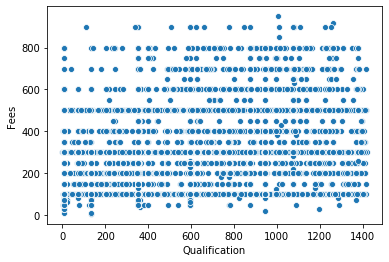

In [47]:
sns.scatterplot(x='Qualification',y='Fees',data=df1c)
# fees are more or less equally distributed among all qualified doctors

In [15]:
df1c['Experience']=le.fit_transform(df1c['Experience'])
for i in df1c['Experience'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

16=['24 years experience']
3=['12 years experience']
63=['9 years experience']
12=['20 years experience']
62=['8 years experience']
36=['42 years experience']
1=['10 years experience']
5=['14 years experience']
15=['23 years experience']
44=['5 years experience']
61=['7 years experience']
13=['21 years experience']
10=['19 years experience']
35=['41 years experience']
24=['31 years experience']
17=['25 years experience']
7=['16 years experience']
6=['15 years experience']
2=['11 years experience']
14=['22 years experience']
31=['38 years experience']
55=['6 years experience']
29=['36 years experience']
4=['13 years experience']
9=['18 years experience']
40=['46 years experience']
34=['40 years experience']
43=['49 years experience']
26=['33 years experience']
0=['0 years experience']
19=['27 years experience']
23=['30 years experience']
47=['52 years experience']
56=['60 years experience']
18=['26 years experience']
28=['35 years experience']
27=['34 years experience']
32=['39 years ex

In [16]:
df1c['Profile']=le.fit_transform(df1c['Profile'])
for i in df1c['Profile'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

5=['Homeopath']
0=['Ayurveda']
3=['ENT Specialist']
1=['Dentist']
4=['General Medicine']
2=['Dermatologists']


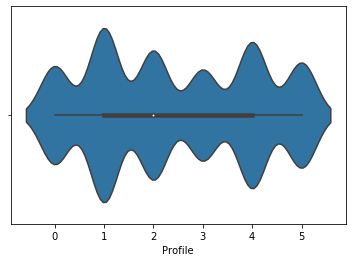

In [17]:
sns.violinplot(x='Profile',data=df1c)
plt.show()
# Number of Dentists are maximum while number of ayurvedic doctors are the least 

In [18]:
imp=SimpleImputer(strategy='most_frequent')
df1c['Rating']=imp.fit_transform(df1c['Rating'].values.reshape(-1,1))

In [19]:
df1c['Rating']=le.fit_transform(df1c['Rating'])
for i in df1c['Rating'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

0=['100%']
49=['98%']
50=['99%']
30=['79%']
46=['95%']
48=['97%']
45=['94%']
39=['88%']
41=['90%']
31=['80%']
44=['93%']
2=['36%']
29=['78%']
38=['87%']
47=['96%']
33=['82%']
40=['89%']
25=['74%']
37=['86%']
43=['92%']
34=['83%']
27=['76%']
36=['85%']
9=['56%']
42=['91%']
18=['68%']
12=['60%']
26=['75%']
19=['69%']
24=['73%']
17=['67%']
28=['77%']
1=['33%']
8=['55%']
22=['71%']
35=['84%']
4=['45%']
14=['63%']
23=['72%']
32=['81%']
13=['62%']
10=['57%']
20=['7%']
6=['48%']
3=['40%']
21=['70%']
15=['64%']
16=['65%']
5=['47%']
11=['58%']
7=['53%']


In [20]:
df1c['Place']=imp.fit_transform(df1c['Place'].values.reshape(-1,1))
df1c['Place']=le.fit_transform(df1c['Place'])
for i in df1c['Place'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

299=['Kakkanad, Ernakulam']
866=['Whitefield, Bangalore']
457=['Mathikere - BEL, Bangalore']
68=['Bannerghatta Road, Bangalore']
337=['Keelkattalai, Chennai']
610=['Porur, Chennai']
326=['Karol Bagh, Delhi']
33=['Arekere, Bangalore']
546=['Old City, Hyderabad']
39=['Athani, Ernakulam']
783=['Thousand Lights, Chennai']
735=['Somajiguda, Hyderabad']
131=['Coimbatore Racecourse, Coimbatore']
287=['Jubilee Hills, Hyderabad']
364=['Kondli, Delhi']
699=['Saroor Nagar, Hyderabad']
766=['Tambaram West, Chennai']
619=['Purasawakkam, Chennai']
290=['KPHB, Hyderabad']
228=['HSR Layout, Bangalore']
605=['Pollachi, Coimbatore']
824=['Vasundhra Enclave, Delhi']
112=['Chembur, Mumbai']
772=['Thammanam, Ernakulam']
28=['Andheri, Mumbai']
586=['Pattom, Thiruvananthapuram']
388=['Kukatpally, Hyderabad']
811=['Vadavalli, Coimbatore']
147=['Defence Colony, Delhi']
67=['Banjara Hills, Hyderabad']
732=['Sion West, Mumbai']
95=['CR Park, Delhi']
478=['Mogappair East, Chennai']
249=['IP Extension, Delhi']
675

633=['Rajakilpakkam, Chennai']
217=['Greater Kailash, Delhi']
422=['Madinaguda, Hyderabad']
88=['Borivali East, Mumbai']
288=['Juhu, Mumbai']
489=['Mugalivakkam, Chennai']
237=['Hebbal, Bangalore']
353=['Kirti Nagar, Delhi']
55=['Balaramapuram, Thiruvananthapuram']
79=['Bhandup East, Mumbai']
808=['VV Puram, Bangalore']
350=['Kilpauk, Chennai']
264=['Jacob Circle, Mumbai']
729=['Singasandra, Bangalore']
342=['Khairatabad, Hyderabad']
129=['Coimbatore Aerodrome, Coimbatore']
253=['J.C Nagar, Bangalore']
516=['Naraina Vihar, Delhi']
853=['Virugambakkam, Chennai']
625=['RK Puram, Delhi']
58=['Banashankari 1st Stage, Bangalore']
400=['Lajpat Nagar 4, Delhi']
277=['Jayanagar 5 Block, Bangalore']
310=['Kalyanpuri, Hyderabad']
767=['Tambaram, Chennai']
407=['Laxmi Nagar, Delhi']
25=['Anand Vihar, Delhi']
109=['Charni Road, Mumbai']
581=['Patel Nagar East, Delhi']
279=['Jayanagar 9 Block, Bangalore']
175=['Ecil, Hyderabad']
641=['Ramamurthy Nagar, Bangalore']
630=['Raj Nagar - 2, Delhi']
126=[

744=['Subhash Nagar, Delhi']
437=['Mallepally, Hyderabad']
185=['Eroor South, Ernakulam']
401=['Lajpat Nagar III, Delhi']
358=['Kodungaiyur, Chennai']
394=['Kuppakonanpudur, Coimbatore']
573=['Paradise, Hyderabad']
663=['Rohini Sector 4, Delhi']
369=['Koramangala 4 Block, Bangalore']
165=['Dwarka Sector 3, Delhi']
160=['Durga Puri, Delhi']
302=['Kalamassery, Ernakulam']
223=['Gulmohar Park, Delhi']
7=['Adugodi, Bangalore']
486=['Moti Nagar, Hyderabad']
508=['Nallagandla, Hyderabad']
212=['Gowrivakkam, Chennai']
592=['Periyar Nagar, Chennai']
42=['Austin Town, Bangalore']
9=['Afzalgunj, Hyderabad']
135=['Cotton Hill, Thiruvananthapuram']
204=['Goldwins, Coimbatore']
395=['Kuravankonam, Thiruvananthapuram']
662=['Rohini Sector 3, Delhi']
399=['Lado Sarai, Delhi']
368=['Koramangala 2 Block, Bangalore']
418=['Madangir, Delhi']
453=['Marine Drive, Mumbai']
452=['Marine Drive, Ernakulam']
29=['Angamaly, Ernakulam']
523=['Neelankarai, Chennai']
127=['Churchgate, Mumbai']
303=['Kalapatti, Coim

In [21]:
df1c

,Qualification,Experience,Rating,Place,Profile,Fees
0,401,16,0,299,5,100
1,73,3,49,866,0,350
2,1135,63,0,457,3,300
3,464,3,0,68,0,250
4,10,12,0,337,0,250
...,...,...,...,...,...,...
5956,1075,10,49,70,3,300
5957,596,26,0,541,4,100
5958,596,35,48,216,4,600
5959,943,6,41,850,4,100


In [22]:
df2=dftest.drop('Miscellaneous_Info',axis=1)
df2

,Qualification,Experience,Rating,Place,Profile
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist
...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist


In [23]:
df2c=df2.copy()

In [54]:
df2c['Qualification']=le.fit_transform(df2c['Qualification'])
df2c['Experience']=le.fit_transform(df2c['Experience'])
df2c['Profile']=le.fit_transform(df2c['Profile'])
df2c['Rating']=imp.fit_transform(df2c['Rating'].values.reshape(-1,1))
df2c['Rating']=le.fit_transform(df2c['Rating'])
df2c['Place']=imp.fit_transform(df2c['Place'].values.reshape(-1,1))
df2c['Place']=le.fit_transform(df2c['Place'])

In [31]:
df1c.skew()

Qualification    0.239720
Experience       0.823531
Rating           0.817666
Place            0.124862
Profile          0.108803
Fees             0.751870
dtype: float64

# Training the Model 

In [32]:
x_testt=df2c
x=df1c.iloc[:,0:-1]
y=df1c.iloc[:,-1]

In [33]:
x.shape,x_testt.shape,y.shape

((5961, 5), (1987, 5), (5961,))

In [55]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [36]:
maxr=0
for i in range(41,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.3)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    score=lm.score(x_train,y_train)
    print('accuracy score correspondng to random state',i,'is:',score)
    if score>maxr:
        maxr=score
        finalr=i
print()
print('maximum score corresponding to random state',finalr,'is',maxr)

accuracy score correspondng to random state 41 is: 0.09523873815551143
accuracy score correspondng to random state 42 is: 0.08584323417324147
accuracy score correspondng to random state 43 is: 0.09176088077931388
accuracy score correspondng to random state 44 is: 0.08298871714444045
accuracy score correspondng to random state 45 is: 0.09037504757886428
accuracy score correspondng to random state 46 is: 0.09918215514504969
accuracy score correspondng to random state 47 is: 0.0966918801164216
accuracy score correspondng to random state 48 is: 0.0914387981669682
accuracy score correspondng to random state 49 is: 0.09085541211467119
accuracy score correspondng to random state 50 is: 0.09642191658456034
accuracy score correspondng to random state 51 is: 0.09463786091348014
accuracy score correspondng to random state 52 is: 0.10078077732435031
accuracy score correspondng to random state 53 is: 0.09808028173552386
accuracy score correspondng to random state 54 is: 0.08895256974616361
accuracy

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=52,test_size=0.3)

In [38]:
lm.fit(x_train,y_train)
## fitting the training part with algorithm. 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
print('score:',lm.score(x_train,y_train))
# we achieve the score of 0.99 which implies model has learnt almost closed to 99% perfection.

score: 0.10078077732435031


In [40]:
ls=Lasso()
alphavalue={'alpha':[1.0,0.1,0.01,0.001,0]}
grid=GridSearchCV(ls,param_grid=alphavalue)
grid.fit(x,y)
print(grid)
print(grid.best_score_)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1.0, 0.1, 0.01, 0.001, 0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.0901640458604566
{'alpha': 0.1}


In [41]:
ls=Lasso(alpha=0.1)
ls.fit(x_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [42]:
ls.score(x_train,y_train)

0.10077962119980632

In [43]:
rf=RandomForestRegressor(n_estimators=450,random_state=50)
rf.fit(x_train,y_train)
predr=rf.predict(x_test)
print(rf.score(x_train,y_train))
# used ensemble technique to achieve better score

0.882660966163426


In [44]:
x_testt=sc.fit_transform(x_testt)

In [45]:
predictscore=rf.predict(x_testt)
predictscore

array([285.33333333, 297.64444444, 328.62222222, ..., 243.28888889,
       239.        , 476.66666667])

In [46]:
joblib.dump(rf,'rffee.obj')

['rffee.obj']